In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table, Column, MaskedColumn

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
hdu1 = fits.open('gaiadr3_close.fit')
data1 = hdu1[1].data
columns1 = hdu1[1].columns

hdu2 = fits.open('gaiadr3_bright.fit')
data2 = hdu2[1].data
columns2 = hdu2[1].columns


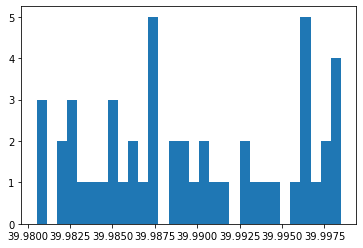

In [4]:
#
#  Gaia parallaxes are in the table column 'Plx'.
#  They are given in mas (milliarcseconds) so the distance in kpc is 1/Plx
#

# This is a histogram of the distances in pc

plt.hist(1000.0/data1['Plx'],bins=30);





In [5]:
e_plx_data1 = data1[np.where(data1['e_Plx']<0.25)]
BP_RP_data1 = e_plx_data1[np.where(e_plx_data1['BP-RP']>0)]
Plx_data1 = BP_RP_data1[np.where(BP_RP_data1['Plx']>0)]

e_plx_data2 = data2[np.where(data2['e_Plx']<0.25)]
BP_RP_data2 = e_plx_data2[np.where(e_plx_data2['BP-RP']>0)]
Plx_data2 = BP_RP_data2[np.where(BP_RP_data2['Plx']>0)]

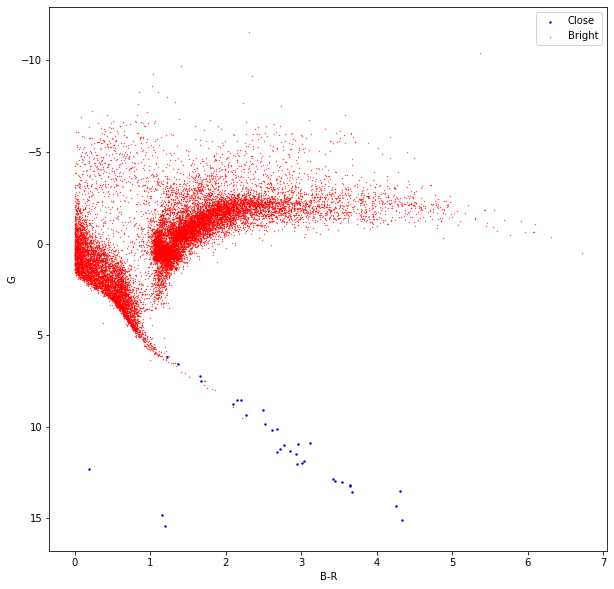

In [6]:
#
#  This is a colour-magnitude diagram
#
#  We adjust the magnitudes to an absolute scale by subtracting the distance modulus.
#

plt.figure(figsize=(10,10))
mag_g_close = Plx_data1['Gmag']-5*np.log10(1000.0/Plx_data1['Plx'])+5
mag_g_bright = Plx_data2['Gmag']-5*np.log10(1000.0/Plx_data2['Plx'])+5
plt.scatter(Plx_data1['BP-RP'],mag_g_close,s=2,c='b', label= 'Close')
plt.scatter(Plx_data2['BP-RP'],mag_g_bright,s=0.1,c='r', label = 'Bright')
plt.xlabel('B-R')
plt.ylabel('G')
plt.legend()

# Higher magnitudes are fainter so invert axis
plt.gca().invert_yaxis()




In [7]:
# The bright stars are "bright" because they are intrinsically luminous

In [8]:
t_eff_sol = 5040
theta_close = 0.4988+0.429*Plx_data1['BP-RP'] - 0.0287*Plx_data1['BP-RP']**2
t_eff_close = t_eff_sol/theta_close

M_sol = 4.74
log_L_close = -0.4*(mag_g_close-M_sol)

theta_bright = 0.4988+0.429*Plx_data2['BP-RP'] - 0.0287*Plx_data2['BP-RP']**2
t_eff_bright = t_eff_sol/theta_bright

log_L_bright = -0.4*(mag_g_bright-M_sol)

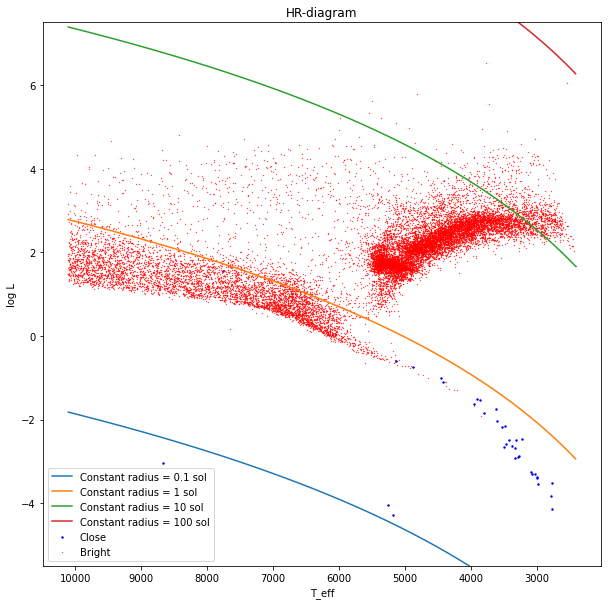

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(t_eff_close, log_L_close, s=2,c='b', label= 'Close')
plt.scatter(t_eff_bright, log_L_bright, s=0.1,c='r', label = 'Bright')
x = np.linspace(min(t_eff_bright), max(t_eff_bright), 1000)    # Lines of constant radii
for radius in [0.1, 1, 10, 100]:
    log_L = np.log(radius**2 *(x/5040)**4)
    plt.plot(x, log_L, label=f'Constant radius = {radius} sol')
plt.ylim(-5.5, 7.5)
plt.title("HR-diagram")
plt.xlabel("T_eff")
plt.ylabel('log L')
plt.legend()

# Lower temps are bluer so flip x axis to align with standard HR diagrams
plt.gca().invert_xaxis()
plt.savefig("HW1 HR-diagram)